In [130]:
import numpy as np

class KNearestNeighbor():
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y, p):
        ## Calculate distance of each point from the new datapoint
        p_dist_matrix = {}
        index = 0
        for x in zip(X, y):
            p_dist_matrix[index] = np.abs(np.linalg.norm(np.array(x[0]) - np.array(p)))
            index+=1
        return p_dist_matrix
        
    def predict(self, X, y, p):
        p_dist_matrix = self.fit(X, y, p)
        p_dist_matrix_sorted = dict(sorted(p_dist_matrix.items(), key=lambda item: item[1]))
        cluster_count = {}
        count = 1
        for p_dist in p_dist_matrix_sorted.items():
            if count == self.k:
                break
            if y[p_dist[0]] not in cluster_count.keys():
                cluster_count[y[p_dist[0]]] = 1
            else:
                cluster_count[y[p_dist[0]]] += 1
            count += 1
        return max(zip(cluster_count.values(), cluster_count.keys()))[1]

In [136]:
X = [[1,12],[2,5],[3,6],[3,10],[3.5,8],[2,11],[2,9],[1,7],
          [5,3],[3,2],[1.5,9],[7,2],[6,1],[3.8,1],[5.6,4],[4,2],[2,5]]

y = [0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0] 

# testing point p(x,y)
p = [4,7]

# Number of neighbours
k = 2

knn = KNearestNeighbor(k)
knn.fit(X, y, p)
knn.predict(X, y, p)

0

In [137]:
X_df = pd.DataFrame(X, columns=['feature1', 'feature2'])

In [138]:
X_df['y'] = y

In [139]:
X_df

,feature1,feature2,y
0,1.0,12,0
1,2.0,5,0
2,3.0,6,0
3,3.0,10,0
4,3.5,8,0
5,2.0,11,0
6,2.0,9,0
7,1.0,7,0
8,5.0,3,1
9,3.0,2,1


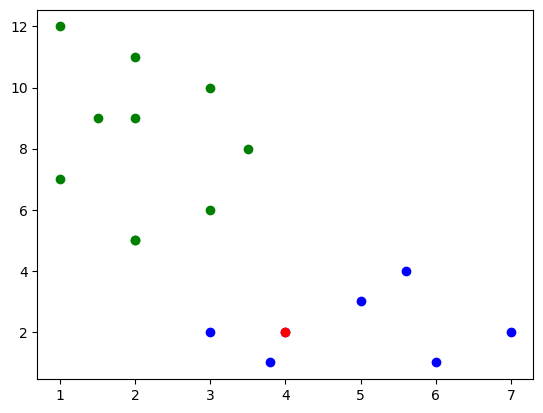

In [141]:
plt.plot(X_df[X_df.y == 0]['feature1'], X_df[X_df.y == 0]['feature2'], 'go');
plt.plot(X_df[X_df.y == 1]['feature1'], X_df[X_df.y == 1]['feature2'], 'bo');
plt.plot([4], [2], 'ro');

### As we can see above the point is predicted correctly in the green class